In [1]:
#%pip install random-survival-forest
#%pip install scikit-survival

In [2]:
import pandas as pd
data = pd.read_csv('encoded_values_2.csv')
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
data = data.drop(columns=['Education_Level'])

# Check data types
data_types = data.dtypes

missing_values, data_types


(Gender                             0
 College                            0
 Churn                              0
 Level                              0
 Education_Level                    0
 Residence                          0
 Usage_Freq                         0
 Network_Strength                   0
 Voice_Calls                        0
 Mobile_Data_Internet               0
 SMS_Text_Messaging                 0
 Data_Exhaustion                    0
 Multiple_Networks                  0
 Other_Networks_Better_Services     0
 Poor_Network_Quality_Coverage      0
 Insufficient_Data_Allowance        0
 Unsatisfactory_Customer_Service    0
 High_Costs_Pricing                 0
 Monthly_Data_Usage                 0
 dtype: int64,
 Gender                             int64
 College                            int64
 Churn                              int64
 Level                              int64
 Residence                          int64
 Usage_Freq                         int64
 Network_St

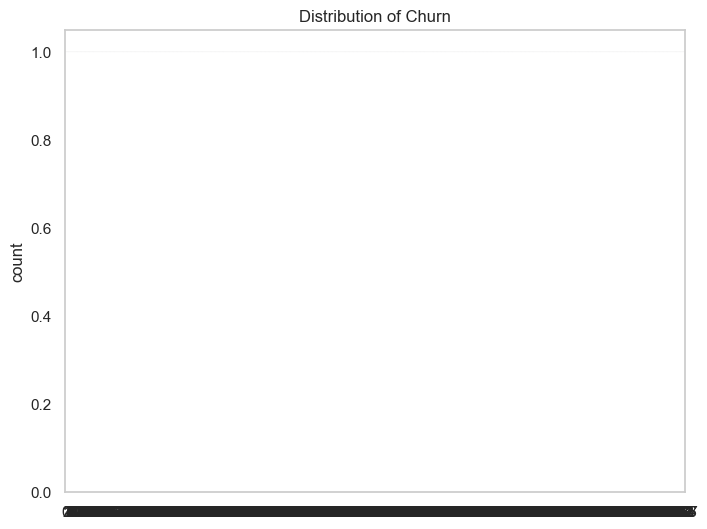

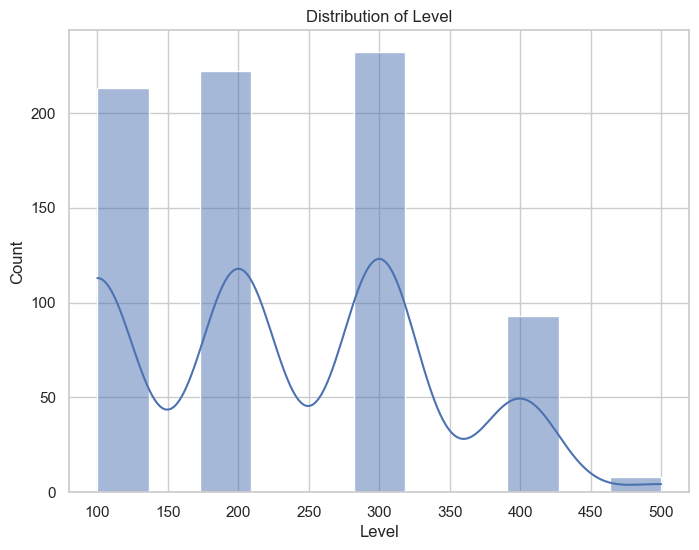

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Churn
plt.figure(figsize=(8, 6))
sns.countplot(data['Churn'])
plt.title('Distribution of Churn')
plt.show()

# Distribution of Level
plt.figure(figsize=(8, 6))
sns.histplot(data['Level'], kde=True)
plt.title('Distribution of Level')
plt.show()


<lifelines.CoxPHFitter: fitted with 768 total observations, 644 right-censored observations>
             duration col = 'Level'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 768
number of events observed = 124
   partial log-likelihood = -723.74
         time fit was run = 2024-07-18 01:33:36 UTC

---
                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                        
Gender                          -0.56      0.57      0.19           -0.94           -0.18                0.39                0.83
College                         -0.03      0.97      0.05           -0.14            0.07                0.87                1.07
Residence                       -0.09      0.91      0.20           -0.48            0.30                0.62                1.35
Usage_Freq                      -0.00      1.00      0.06           -0.12            0.12                0.88                1.12
Network_Strength                 0.23      1.26      0.09            0.06            0.40                1.07                1.49
Voice_Calls                      0.16      1.18      0.25           -0.32            0.65                0.73                1.91
Mobile_Data_Internet             0.32      1.37      0.30           -0.27            0.90                0.76                2.46
SMS_Text_Messaging              -0.10      0.90      0.18           -0.46            0.26                0.63                1.30
Data_Exhaustion                  0.41      1.51      0.27           -0.11            0.93                0.90                2.54
Multiple_Networks                0.21      1.23      0.43           -0.63            1.05                0.53                2.85
Other_Networks_Better_Services   0.13      1.14      0.27           -0.39            0.66                0.68                1.93
Poor_Network_Quality_Coverage   -0.17      0.85      0.20           -0.56            0.22                0.57                1.25
Insufficient_Data_Allowance      0.12      1.12      0.19           -0.26            0.49                0.77                1.64
Unsatisfactory_Customer_Service -0.15      0.86      0.19           -0.52            0.21                0.59                1.23
High_Costs_Pricing               0.16      1.18      0.19           -0.20            0.53                0.82                1.70
Monthly_Data_Usage              -0.06      0.94      0.07           -0.20            0.08                0.82                1.08

                                 cmp to     z      p  -log2(p)
covariate                                                     
Gender                             0.00 -2.90 <0.005      8.05
College                            0.00 -0.62   0.53      0.90
Residence                          0.00 -0.45   0.65      0.62
Usage_Freq                         0.00 -0.05   0.96      0.06
Network_Strength                   0.00  2.71   0.01      7.24
Voice_Calls                        0.00  0.67   0.50      0.99
Mobile_Data_Internet               0.00  1.06   0.29      1.78
SMS_Text_Messaging                 0.00 -0.55   0.58      0.79
Data_Exhaustion                    0.00  1.54   0.12      3.03
Multiple_Networks                  0.00  0.49   0.62      0.68
Other_Networks_Better_Services     0.00  0.50   0.61      0.70
Poor_Network_Quality_Coverage      0.00 -0.85   0.40      1.33
Insufficient_Data_Allowance        0.00  0.61   0.54      0.88
Unsatisfactory_Customer_Service    0.00 -0.83   0.41      1.30
High_Costs_Pricing                 0.00  0.89   0.38      1.41
Monthly_Data_Usage                 0.00 -0.85   0.39      1.34
---
Concordance = 0.62
Partial AIC = 1479.47
log-likelihood ratio test = 23.34 on 16 df
-log2(p) of ll-ratio test = 3.25

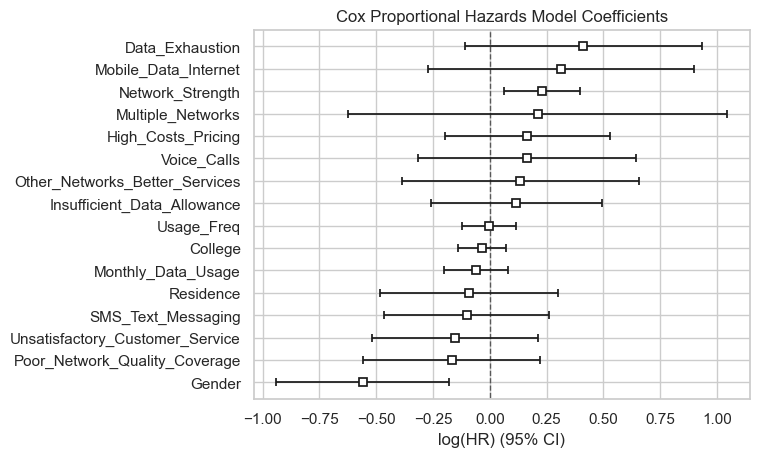

In [5]:
from lifelines import CoxPHFitter
# Initialize the Cox Proportional Hazards model
cph = CoxPHFitter()

# Fit the model
cph.fit(data, duration_col='Level', event_col='Churn')

# Display the summary
cph.print_summary()

# Plot the coefficients
cph.plot()
plt.title('Cox Proportional Hazards Model Coefficients')
plt.show()


<lifelines.CoxPHFitter: fitted with 768 total observations, 644 right-censored observations>
             duration col = 'Level'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 768
number of events observed = 124
   partial log-likelihood = -723.74
         time fit was run = 2024-07-18 01:33:36 UTC

---
                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                        
Gender                          -0.56      0.57      0.19           -0.94           -0.18                0.39                0.83
College                         -0.03      0.97      0.05           -0.14            0.07                0.87                1.07
Residence                       -0.09      0.91      0.20           -0.48            0.30                0.62                1.35
Usage_Freq                      -0.00      1.00      0.06           -0.12            0.12                0.88                1.12
Network_Strength                 0.23      1.26      0.09            0.06            0.40                1.07                1.49
Voice_Calls                      0.16      1.18      0.25           -0.32            0.65                0.73                1.91
Mobile_Data_Internet             0.32      1.37      0.30           -0.27            0.90                0.76                2.46
SMS_Text_Messaging              -0.10      0.90      0.18           -0.46            0.26                0.63                1.30
Data_Exhaustion                  0.41      1.51      0.27           -0.11            0.93                0.90                2.54
Multiple_Networks                0.21      1.23      0.43           -0.63            1.05                0.53                2.85
Other_Networks_Better_Services   0.13      1.14      0.27           -0.39            0.66                0.68                1.93
Poor_Network_Quality_Coverage   -0.17      0.85      0.20           -0.56            0.22                0.57                1.25
Insufficient_Data_Allowance      0.12      1.12      0.19           -0.26            0.49                0.77                1.64
Unsatisfactory_Customer_Service -0.15      0.86      0.19           -0.52            0.21                0.59                1.23
High_Costs_Pricing               0.16      1.18      0.19           -0.20            0.53                0.82                1.70
Monthly_Data_Usage              -0.06      0.94      0.07           -0.20            0.08                0.82                1.08

                                 cmp to     z      p  -log2(p)
covariate                                                     
Gender                             0.00 -2.90 <0.005      8.05
College                            0.00 -0.62   0.53      0.90
Residence                          0.00 -0.45   0.65      0.62
Usage_Freq                         0.00 -0.05   0.96      0.06
Network_Strength                   0.00  2.71   0.01      7.24
Voice_Calls                        0.00  0.67   0.50      0.99
Mobile_Data_Internet               0.00  1.06   0.29      1.78
SMS_Text_Messaging                 0.00 -0.55   0.58      0.79
Data_Exhaustion                    0.00  1.54   0.12      3.03
Multiple_Networks                  0.00  0.49   0.62      0.68
Other_Networks_Better_Services     0.00  0.50   0.61      0.70
Poor_Network_Quality_Coverage      0.00 -0.85   0.40      1.33
Insufficient_Data_Allowance        0.00  0.61   0.54      0.88
Unsatisfactory_Customer_Service    0.00 -0.83   0.41      1.30
High_Costs_Pricing                 0.00  0.89   0.38      1.41
Monthly_Data_Usage                 0.00 -0.85   0.39      1.34
---
Concordance = 0.62
Partial AIC = 1479.47
log-likelihood ratio test = 23.34 on 16 df
-log2(p) of ll-ratio test = 3.25

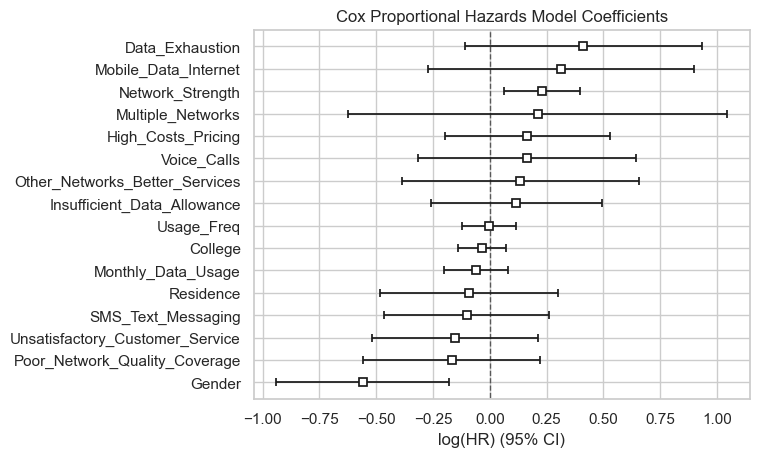

In [6]:
from lifelines import CoxPHFitter

# Initialize the Cox Proportional Hazards model
cph = CoxPHFitter()

# Fit the model
cph.fit(data, duration_col='Level', event_col='Churn')

# Display the summary
cph.print_summary()

# Plot the coefficients
cph.plot()
plt.title('Cox Proportional Hazards Model Coefficients')
plt.show()


In [7]:
# Check proportional hazards assumption
cph.check_assumptions(data, p_value_threshold=0.05)

# Interpretation and validation
# (This will involve checking the summary output, coefficients, and assumption checks)


Proportional hazard assumption looks okay.


[]

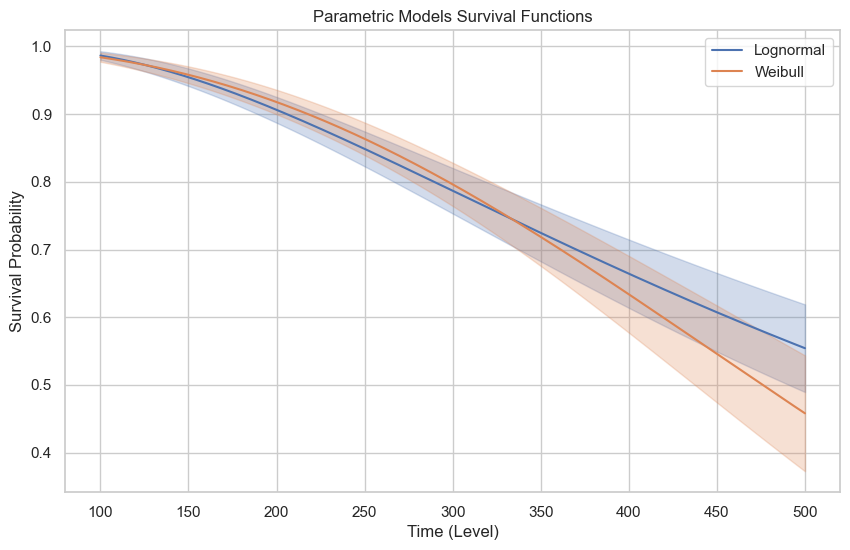

In [8]:
from lifelines import LogNormalFitter, WeibullFitter

# Fit the Lognormal model
lnf = LogNormalFitter()
lnf.fit(durations=data['Level'], event_observed=data['Churn'])

# Fit the Weibull model
wf = WeibullFitter()
wf.fit(durations=data['Level'], event_observed=data['Churn'])

# Plot the survival functions of both models
plt.figure(figsize=(10, 6))
lnf.plot_survival_function(label='Lognormal')
wf.plot_survival_function(label='Weibull')
plt.title('Parametric Models Survival Functions')
plt.xlabel('Time (Level)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


In [9]:
# Lognormal model summary
lnf.print_summary()

# Weibull model summary
wf.print_summary()

# Goodness-of-fit metrics
lnf_aic = lnf.AIC_
wf_aic = wf.AIC_

lnf_aic, wf_aic


<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 768 total observations, 644 right-censored observations>
   number of observations = 768
number of events observed = 124
           log-likelihood = -974.87
               hypothesis = mu_ != 0, sigma_ != 1

---
        coef  se(coef)  coef lower 95%  coef upper 95%
mu_     6.32      0.07            6.18            6.46
sigma_  0.78      0.05            0.68            0.88

        cmp to     z      p  -log2(p)
mu_       0.00 90.22 <0.005       inf
sigma_    1.00 -4.41 <0.005     16.55
---
AIC = 1953.73

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 768 total observations, 644 right-censored observations>
   number of observations = 768
number of events observed = 124
           log-likelihood = -972.60
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef  se(coef)  coef lower 95%  coef upper 95%
lambda_ 554.04     30.95          493.37          614.70
rho_      2.41      0.17            2.07            2.75

         cmp to     z      p  -log2(p)
lambda_    1.00 17.87 <0.005    234.78
rho_       1.00  8.18 <0.005     51.65
---
AIC = 1949.20

(1953.734610577035, 1949.1987443113449)

In [10]:
# Get the AIC value of the Cox PH model
cox_aic = cph.AIC_partial_

# AIC values of all models
aic_values = {
    'Cox PH': cox_aic,
    'Lognormal': lnf.AIC_,
    'Weibull': wf.AIC_
}

aic_values


{'Cox PH': 1479.4708456637782,
 'Lognormal': 1953.734610577035,
 'Weibull': 1949.1987443113449}

In [11]:
# cox_cindex

In [12]:
# from lifelines.utils import concordance_index

# # Ensure 'Level' and 'Churn' columns are 1-dimensional
# level = data['Level'].values.flatten()
# churn = data['Churn'].values.flatten()

# # Calculate the C-index for Cox PH model
# cox_predictions = -cph.predict_partial_hazard(data).values.flatten()
# cox_cindex = concordance_index(level, cox_predictions, churn)

# # Calculate the C-index for Lognormal model
# lognormal_predictions = -lnf.predict(data[['Level']]).values.flatten()
# lognormal_cindex = concordance_index(level, lognormal_predictions, churn)

# # Calculate the C-index for Weibull model
# weibull_predictions = -wf.predict(data[['Level']]).values.flatten()
# weibull_cindex = concordance_index(level, weibull_predictions, churn)

# cox_cindex, lognormal_cindex, weibull_cindex


In [13]:
# print(f"Level shape: {level.shape}")
# print(f"Churn shape: {churn.shape}")
# print(f"Cox Predictions shape: {cox_predictions.shape}")
# print(f"Lognormal Predictions shape: {lognormal_predictions.shape}")
# print(f"Weibull Predictions shape: {weibull_predictions.shape}")
